# Data Visualization

In [1]:
%reload_ext autoreload
%autoreload 2

#Phase Diagram
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

#Adj Matrix Visualization
import pathpy as pp
from IPython.display import *
from mesa import Model
from mesa import Agent
import matplotlib.pyplot as plt


In [2]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 30
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)
adjacencyMatrix = np.random.rand(num_agents, num_agents)
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 1000
lecture_duration = 10
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
initial_emotion_mu = 0.6
initial_emotion_sigma = 2


# ========================updating adjacency matrix=======================
updateAdj = True
friendship_increase = 0.1
my_lambda = 0.9



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 0.8
initial_emotion_teacher = 0.9
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 5
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters fpr the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = False
group_num = 5




# ===========================run model===============================
model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
model.run_model()

## Phase Diagram 

* Run different simulations with different values for two paramenters and gives a 2-D data visualization
* Creates a AdjMatrix with a gaussian distribution. The values smaller than 0 becomes 0 and bigger than 1 becomes 1 
* **Note:** $\sigma$ has to be << of $\mu$ to avoid a completely disconnected network (? not sure) (The denominator is equal to zero) 

In [50]:
def AdjacencyGauss(mu, sigma, num_agents): 
    adjacencyMatrix = np.random.normal(mu, sigma, (num_agents, num_agents))
    adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
    for i in range(num_agents):
        for j in range(num_agents): 
            if adjacencyMatrix[i][j]<0:
                adjacencyMatrix[i][j]=0
            elif adjacencyMatrix[i][j]>1:
                adjacencyMatrix[i][j]=1
    return adjacencyMatrix

                

In [49]:
mus = np.arange(0.5, 1, step=0.05)
sigmas = np.arange(0.05, 0.50, step=0.15)
repetitions = 1

average_attendance_rate = np.zeros((mus.shape[0], sigmas.shape[0]))

for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        for k in range(repetitions): 
            print (mu, sigma)
            adjacencyMatrix = AdjacencyGauss(mu, sigma, num_agents)
            model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
            model.run_model()
            average_attendance_rate[i][j] += model.datacollector.get_model_vars_dataframe()['Attendance'].iloc[-1]
        average_attendance_rate[i][j] /= repetitions 
        
    
        

0.5 0.05
0.5 0.2
0.5 0.35000000000000003
0.55 0.05
0.55 0.2
0.55 0.35000000000000003
0.6000000000000001 0.05
0.6000000000000001 0.2
0.6000000000000001 0.35000000000000003
0.6500000000000001 0.05
0.6500000000000001 0.2
0.6500000000000001 0.35000000000000003
0.7000000000000002 0.05
0.7000000000000002 0.2
0.7000000000000002 0.35000000000000003
0.7500000000000002 0.05
0.7500000000000002 0.2
0.7500000000000002 0.35000000000000003
0.8000000000000003 0.05
0.8000000000000003 0.2
0.8000000000000003 0.35000000000000003
0.8500000000000003 0.05
0.8500000000000003 0.2
0.8500000000000003 0.35000000000000003
0.9000000000000004 0.05
0.9000000000000004 0.2
0.9000000000000004 0.35000000000000003
0.9500000000000004 0.05
0.9500000000000004 0.2
0.9500000000000004 0.35000000000000003


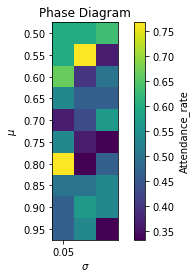

In [53]:
plt.imshow(average_attendance_rate)
plt.xlabel('$\\sigma$')
plt.ylabel('$\\mu$')
plt.title("Phase Diagram")
plt.yticks(range(len(mus)), ['{:.2f}'.format(m) for m in mus])
plt.xticks(range(0,len(sigmas),4), ['{:.2f}'.format(sigmas[i]) for i in range(0,len(sigmas),4)])
plt.colorbar(label='Attendance_rate')
plt.show()

### Adjacency Matrix Visualization:

* Visualization of nodes and links without weights 

In [12]:
def plot_network(values):
    # get the plot
    # Lets assume: agent we are interest in is 1(red), neighbors are 2(blue), all other agents are 0(white)
        net = values[0]
        colors = values[1]
        html = pp.visualisation.html.generate_html(net,  **{"node_color": colors}) #double ** is a dictionary ex. params['nodecolors'] = colors
        chart = HTML(html)
        display(chart)

def networkneigh(agent,adjMatrix):
    outNeighbors = []
    inNeighbors = []
    
    nagents = adjMatrix.shape[1]
    
    for idx in range(nagents):
        if idx!=agent:
            if adjMatrix[agent,idx] != 0:
                outNeighbors.append(idx)
            if adjMatrix[idx, agent] !=0:
                inNeighbors.append(idx)
    return outNeighbors,inNeighbors

def create_color_net(adjMatrix, pos, noOfAgents):
    net = pp.Network(directed=True)
    colors={}
    outNeighbors,inNeighbors = networkneigh(pos, adjMatrix)
    outnegh, innegh = networkneigh(pos, adjMatrix)
    for node_id in range(noOfAgents):
        if node_id ==pos:
            colors[str(node_id)] = "#FF0000"
        elif node_id in outnegh:
            colors[str(node_id)] = "#0000FF"
        elif node_id in innegh:
            colors[str(node_id)] = "#00FF00"
        net.add_node(str(node_id))
    for source in range(noOfAgents):
        for target in range(noOfAgents):
            if adjMatrix[source,target] == 0:
                continue
            net.add_edge(str(source), str(target))
    return net, colors


def neighbor(obj,pos, noOfAgents):
    
    "Arguments: Adj Matrix, agent of interest, number of agents"

    # initialize a list for neighbors
    neighbors = []
    #adjacency matrix neighbors are determined by the links(networks)
    #and not by proximity, hence we create a random directed network 
    adjMatrix = obj
    net, colors = create_color_net(adjMatrix, pos, noOfAgents)
    agentStates = [net, colors]
    plot_network(agentStates)
    


In [56]:

neighbor(adjacencyMatrix,1, num_agents)

### Attendance Rate Evolution

In [4]:
def plot_attendance(model):
    plt.plot(model.datacollector.get_model_vars_dataframe()['Attendance'])
    plt.xlabel('Steps')
    plt.ylabel('Attendance')
    plt.show()

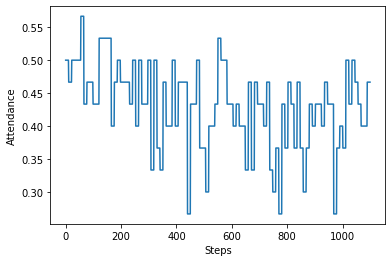

In [5]:
plot_attendance(model)

### Agents' emotion evolution 

In [6]:
def plot_agents(model):
    """ Plot opinion dynamics of all agents 
    Args:
        model 
    """
    
    df=model.datacollector.get_agent_vars_dataframe().reset_index()
    #a dataframe of three columns ["Step", "AgentID", "Opinion"]
    timesteps = df["Step"].unique()
    agent_ids = df["AgentID"].unique()

    # plot each agent's emotion evolution against time steps
    for i in agent_ids:
        emotions_i = df.loc[df.loc[:,"AgentID"] == i, :]["Emotion"].values
        color = emotions_i[0]
        plt.plot(timesteps, emotions_i, "-", alpha=0.3,
                 color=plt.get_cmap('rainbow')(color))
    plt.show()

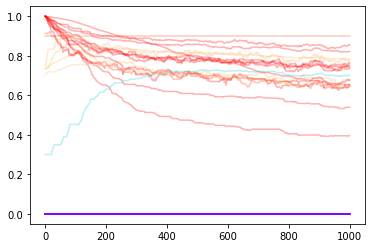

In [7]:
plot_agents(model)

### Adjacency Matrix weights: 

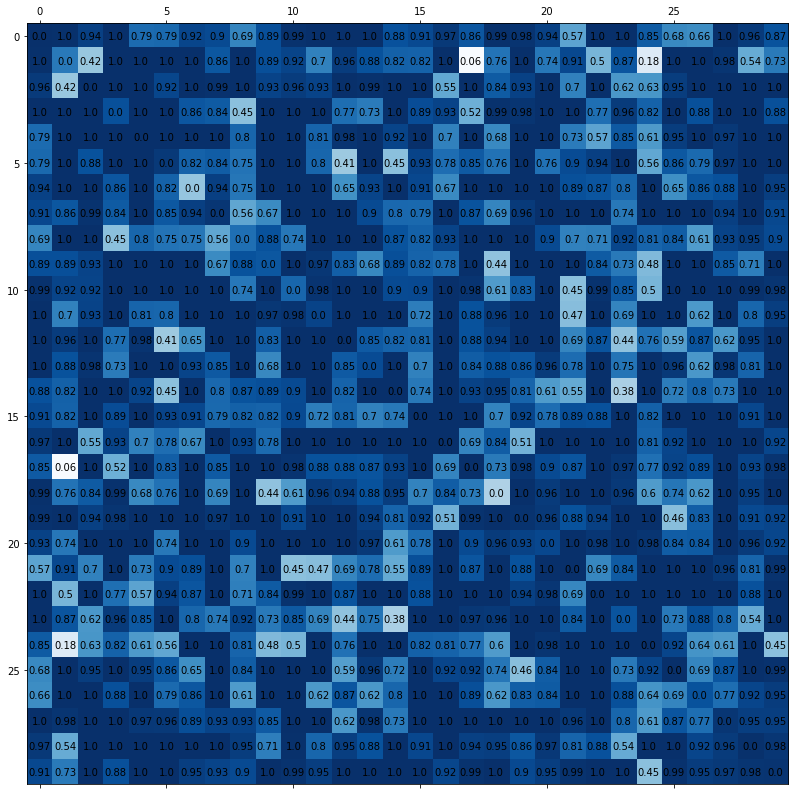

In [55]:
def plot_adj_matrix(adjacencyMatrix):

    fig, ax = plt.subplots(figsize=(14,14))
    ax.matshow(adjacencyMatrix, cmap=plt.cm.Blues)

    for i in range(num_agents):
        for j in range(num_agents):
            if i==j: 
                adjacencyMatrix[i][j]=0

            c = round(adjacencyMatrix[j,i],2)
            ax.text(i, j, str(c), va='center', ha='center')
            

plot_adj_matrix(adjacencyMatrix)

In [60]:
def get_adj_matrix(model, step): 
    """ Get the adj_matrix at each step
    Arguments:  model, 
                    step : -1 to get the last step matrix"""
    return model.datacollector.get_model_vars_dataframe()['adjacencyMatrix'].iloc[step]


### Initial emotion distribution: 

In [101]:
def initial_emotion_hist(model):
    plt.hist(model.datacollector.get_agent_vars_dataframe().reset_index()["Emotion"].iloc[0:num_agents].to_numpy(), 
            bins=np.arange(0,1,1/10))
    plt.xlabel('Value')
    plt.ylabel('Occurence')
    plt.title("Initial Emotion Distribution")
    plt.show()

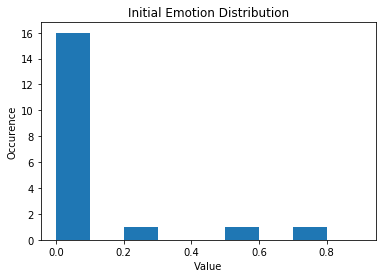

In [102]:
initial_emotion_hist(model)